ArcTan MNIST Algorithm:

initialize environment and load data

In [8]:
#using Python 3.9.7 initialize the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import the data
data = pd.read_csv('..\mnist_train.csv')
dataTest = pd.read_csv('..\mnist_test.csv')

#view the dataset
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Preprocess data

In [23]:
#convert the dataset into numpy array and split the data into dev and training sets
data = np.array(data)
dataTest = np.array(dataTest)
np.random.shuffle(data)
m, n = data.shape

data_dev = dataTest.T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255



data_train = data.T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

In [10]:
#initialize the parameters
def initialize_parameters(size = 784):
    W1 = np.random.rand(10, size) - .5
    b1 = np.random.rand(10, 1) - .5
    W2 = np.random.rand(10,10) - .5
    b2 = np.random.rand(10,1) - .5
    return W1, b1, W2, b2

Activation Function: ArcTan

In [11]:
#Define Activation Function
def Activation(Z):
    Pi = np.pi
    R = (2/(Pi)) * np.arctan((Pi/2) * Z)
    return R

#define the derivative of the activation function
def Activation_derivative(Z):
    R = 1/(1 + np.power(Z,2))
    return R

Other Utility Functions:

In [12]:
#define softmax function
def softmax(Z):
    exp = np.exp(Z - np.max(Z))
    return (exp / exp.sum(axis=0))

#function to hot code Y
def hot_code(Y):
    hotY = np.zeros((Y.size, Y.max()+1))
    hotY[np.arange(Y.size), Y] = 1
    hotY = hotY.T
    return hotY

#get expected values
def get_predict(A2):
    return np.argmax(A2, axis=0)

#get accuracy of current model
def get_accuracy(predict, Y):
    return np.sum(predict == Y) / Y.size

Forward Propagation:

In [13]:
#forward propagation
def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = Activation(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


Backward Propagation:

In [14]:
#backward propagation
def backward_propagation(X, Y, A1, A2, W2, Z1, m):
    #m = Y.size
    hotY = hot_code(Y)
    dZ2 = 2*(A2 - hotY)
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2,1)
    dZ1 = W2.T.dot(dZ2) * Activation_derivative(Z1)
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1,1)
    return dW1, db1, dW2, db2,

Update Parameters:

In [15]:
#update the parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * np.reshape(db1,(10,1))
    W2 -= learning_rate * dW2
    b2 -= learning_rate * np.reshape(db2,(10,1))
    return W1, b1, W2, b2

Gradient Descent:

In [16]:
def gradient_descent(X, Y, iters, learning_rate):
    #initialize the parameters
    update = iters //10
    size, m = X.shape
    W1, b1, W2, b2 = initialize_parameters(size)
    alpha = learning_rate
    prev_acc = 100
    for i in range(iters):
        #forward propagation
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        
        #backward propagation
        dW1, db1, dW2, db2 = backward_propagation(X, Y, A1, A2, W2, Z1, m)

        #update the parameters
        #alpha = learning_rate * (105-prev_acc)/100
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        #print the accuracy every 10th iterations
        if i % update == 0:
            acc = get_accuracy(get_predict(A2), Y)*100
            print(f'Iteration: {i} / {iters} Accuracy: {acc:.3f}%')
        prev_acc = acc 
    print(f'Final Accuracy: {round(get_accuracy(get_predict(A2), Y)*100, 2)}%')

    return W1, b1, W2, b2

Train Model:

In [19]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1000, .65)

Iteration: 0 / 1000 Accuracy: 7.917%
Iteration: 100 / 1000 Accuracy: 87.440%
Iteration: 200 / 1000 Accuracy: 89.778%
Iteration: 300 / 1000 Accuracy: 90.728%
Iteration: 400 / 1000 Accuracy: 91.367%
Iteration: 500 / 1000 Accuracy: 91.907%
Iteration: 600 / 1000 Accuracy: 92.345%
Iteration: 700 / 1000 Accuracy: 92.703%
Iteration: 800 / 1000 Accuracy: 92.617%
Iteration: 900 / 1000 Accuracy: 93.098%
Final Accuracy: 93.18%


Test Model:

In [20]:
#generate prediction for a single image
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predict(A2)
    return predictions

#test the model with a single image from the training set with index, index
def test_prediction(index, W1, b1, W2, b2):
    #retrieve the image and label
    current_image = X_train[:, index, None]
    #make a prediction
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    
    #display the image and the prediction
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    #plot the image
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


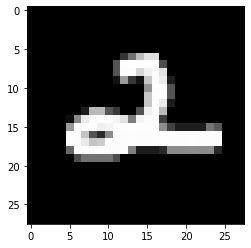

Prediction:  [3]
Label:  3


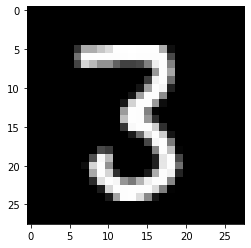

Prediction:  [9]
Label:  9


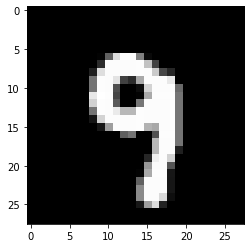

Prediction:  [5]
Label:  5


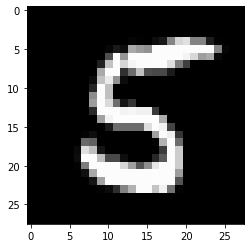

In [21]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Verify Model:


In [24]:
#test against Dev set
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
print(f'Dev Accuracy: {get_accuracy(dev_predictions, Y_dev)*100}%')

Dev Accuracy: 92.41%
